In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plotter
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [ ]:
pip install datasets

In [ ]:
# SET GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [ ]:
import os
os.environ["WANDB_API_KEY"] = "0"

In [ ]:
from datasets import load_dataset

train = load_dataset("psgomez/mix-data", encoding="Latin-1", split="train")
train



Dataset({
    features: ['text', 'label'],
    num_rows: 10000
})

In [ ]:
datas = load_dataset("psgomez/mix-data", encoding="Latin-1",
     delimiter='\t',
     column_names=['label', 'text'],
     download_mode="force_redownload")
datas

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

In [ ]:
train = pd.DataFrame(datas['train'])
train = train.dropna()

In [ ]:
train

,text,label
0,"Lights don't work, but battery heats up. If I...",0
1,May gasgas yung takip nung bote considering na...,0
2,Sana seller bago man lang denilever yung item ...,0
3,I really love it. I Will definitely order agai...,1
4,May crack ang light at sira ang on/off button....,0
...,...,...
9995,I ta-try ko pa yung Roll-Up anti-odor nila. Th...,0
9996,Not safe for food prep Bought the brush to av...,0
9997,Fun Tradition Our family likes this movie. We...,1
9998,Review Great product. The different levels ar...,1


In [ ]:
train, test = train_test_split(train,test_size=0.2)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [ ]:
print("head")
display(train.head())
display(test.head())
print("info")
display(train.info())
display(test.info())
print("isnull")
display(train.isnull().sum())
display(test.isnull().sum())

head


,text,label
0,great omg I absolutely loved this book. i rea...,1
1,D gumagana ang diniliver. Wala din kwenta ang ...,0
2,One Star Complete failure for me. Made at lea...,0
3,which have gotten bad reviews on Amazon This ...,1
4,Five Stars Nice and simple and cheap !,1


,text,label
0,Mukang ma tibay Sia no. 3 Yung gamit ko sapat ...,1
1,Perfect size for favors! I love these pails! ...,1
2,"okay naman po dumating, excited ako matry.",0
3,"cord quit bought this and a 06"" (also copper ...",0
4,Came broken- please advise This product came ...,0


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8000 non-null   object
 1   label   8000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 125.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

isnull


,0
text,0
label,0


,0
text,0
label,0


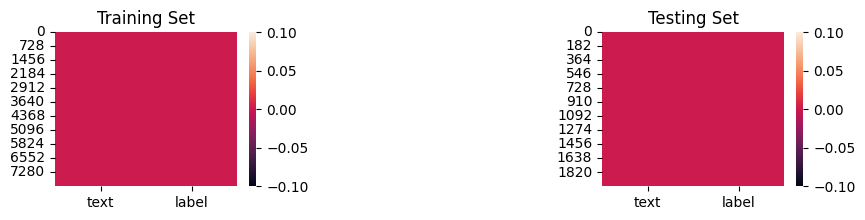

In [ ]:
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.heatmap(test.isnull())
plt.show()

train


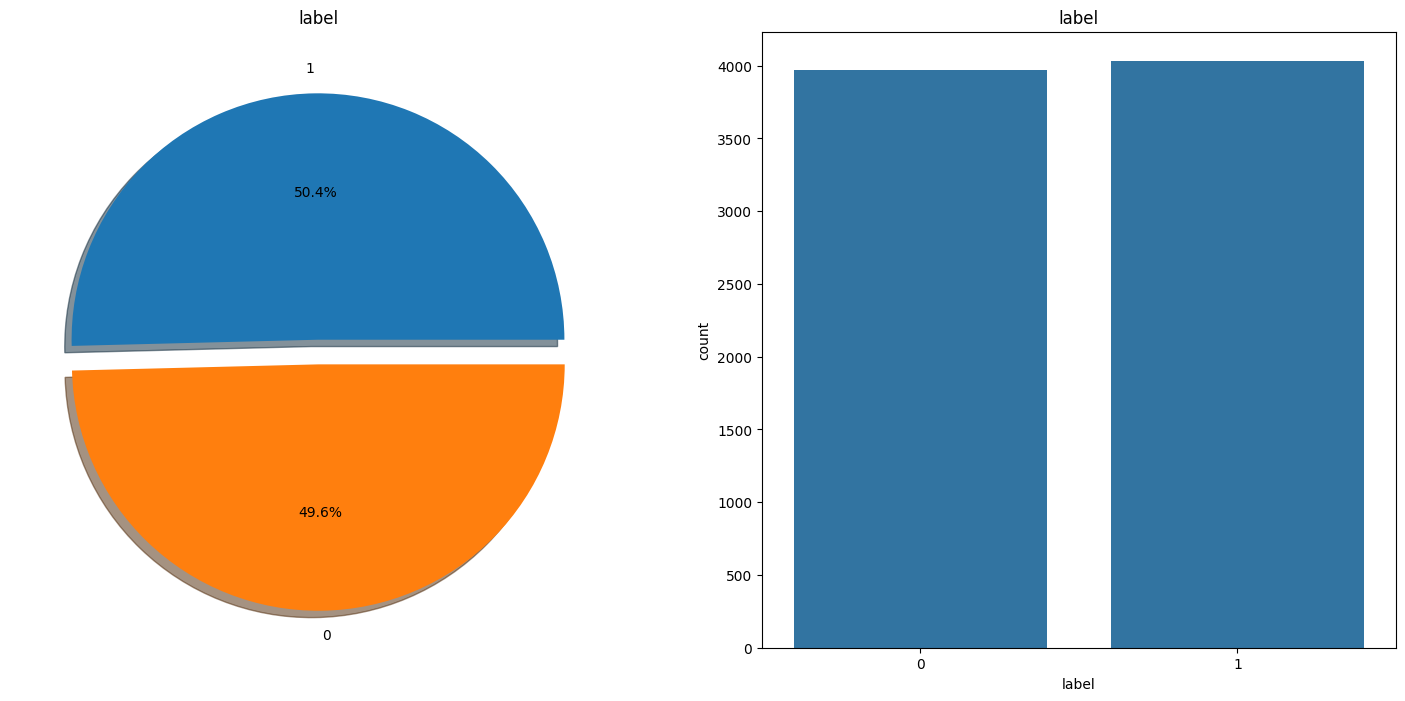

In [ ]:
print("train")
f,ax=plt.subplots(1,2,figsize=(18,8))
train["label"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot(x = train["label"],ax=ax[1])
ax[1].set_title('label')
plt.show()

test


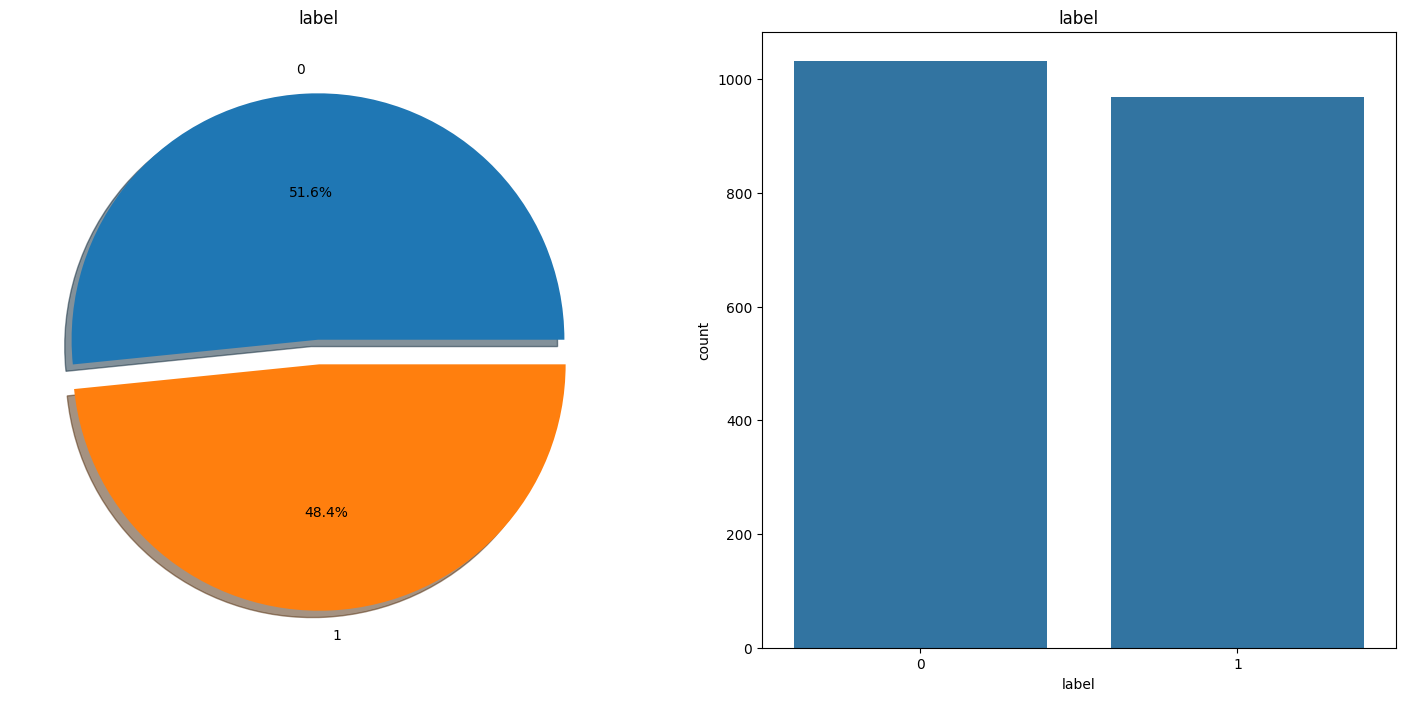

In [ ]:
print("test")
f,ax=plt.subplots(1,2,figsize=(18,8))
test["label"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot(x = test["label"],ax=ax[1])
ax[1].set_title('label')
plt.show()

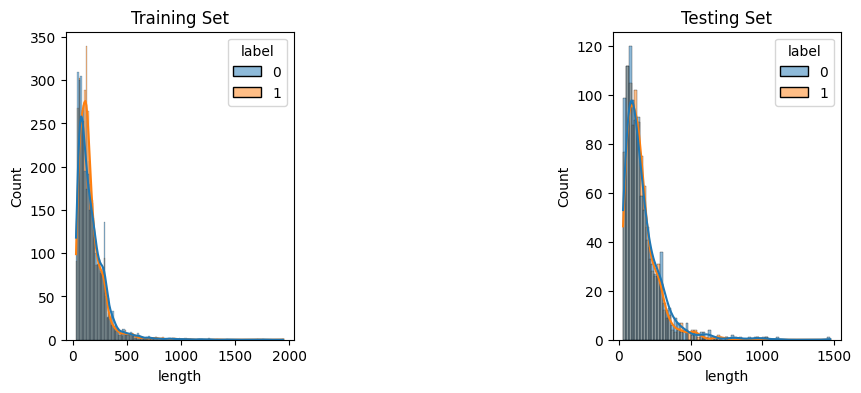

In [ ]:
train['length'] = train['text'].apply(len)
test['length'] = test['text'].apply(len)

plt.figure(figsize = (10, 4))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.histplot(train,x='length',hue='label',kde=True)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.histplot(test,x='length',hue='label',kde=True)
plt.show()

In [ ]:
label_count = train['label'].value_counts().sort_index()
label_count

,count
label,
0,3968
1,4032


In [ ]:
label_names = ['not', 'liked'] #SET 0/1 →'not', 'liked'
label_count.index = label_names
display(label_count)

fig = go.Figure([go.Bar(x=label_names, y=label_count, marker_color='skyblue')])

fig.update_layout(title_text='Number of entries per label', # title of plot
                  xaxis_title_text='Label', # xaxis label
                  yaxis_title_text='Count', # yaxis label
                  )
fig.show()

,count
not,3968
liked,4032


In [ ]:
!pip install evaluate

In [ ]:
import evaluate
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer

In [ ]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
train.columns

Index(['text', 'label', 'length'], dtype='object')

In [ ]:
test.columns

Index(['text', 'label', 'length'], dtype='object')

In [ ]:
# delete unnecessary columns
train = train.drop(labels=['length'], axis=1)
test = test.drop(labels=['length'], axis=1)

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)


train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test)

ds = DatasetDict()
ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [ ]:
def tokenizer_sentence(data):
    return tokenizer(data['text'], truncation=True)  #feature columns

In [ ]:
tokenized_ds = ds.map(tokenizer_sentence, batched=True)

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 6400
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import torch.nn as nn
from transformers import XLMRobertaModel

class CustomXLMRobertaModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaModel, self).__init__()
        model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
        self.roberta = XLMRobertaModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_labels)
        )
        self.loss = nn.CrossEntropyLoss()
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        output = self.dropout(output.pooler_output)
        logits = self.classifier(output)

        if labels is not None:
            loss = self.loss(logits.view(-1, self.num_labels), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return logits

In [ ]:
model = CustomXLMRobertaModel(num_labels=2)

Some weights of XLMRobertaModel were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_metric


training_args = TrainingArguments("/content",
                                  optim="adamw_torch",
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_metric

training_args = TrainingArguments("/content",
                                  optim="adamw_torch",
                                  num_train_epochs=5,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "false"

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.920700,0.538972,0.776250,{'f1': 0.7762499999999999}
2,0.186900,0.224640,0.944375,{'f1': 0.944375}
3,0.112900,0.243423,0.951250,{'f1': 0.95125}
4,0.001100,0.246460,0.956250,{'f1': 0.95625}
5,0.001200,0.256267,0.959375,{'f1': 0.959375}


TrainOutput(global_step=4000, training_loss=0.1444781714777928, metrics={'train_runtime': 1232.0273, 'train_samples_per_second': 25.973, 'train_steps_per_second': 3.247, 'total_flos': 0.0, 'train_loss': 0.1444781714777928, 'epoch': 5.0})

In [ ]:
#To get the training loss and validation loss in the trainer
train_loss = []
val_loss = []
ep = 1
for elem in trainer.state.log_history:
    if 'loss' in elem.keys() and ep in elem.values():
        train_loss.append(elem['loss'])

    if 'eval_loss' in elem.keys() and ep in elem.values():
        val_loss.append(elem['eval_loss'])
        ep += 1

[0.5389717221260071,
 0.2246403694152832,
 0.24342265725135803,
 0.24646049737930298,
 0.2562667727470398]

In [ ]:
predictions = trainer.predict(tokenized_ds["test"])
predictions

PredictionOutput(predictions=array([[-3.3859234,  1.8914969],
       [-4.5379453,  3.5108063],
       [ 3.6647131, -3.4653933],
       ...,
       [ 3.6632738, -3.4631155],
       [ 3.6638246, -3.463637 ],
       [-4.535767 ,  3.5112636]], dtype=float32), label_ids=array([1, 1, 0, ..., 0, 0, 1]), metrics={'test_loss': 0.36007678508758545, 'test_accuracy': 0.9435, 'test_f1': {'f1': 0.9435}, 'test_runtime': 13.7245, 'test_samples_per_second': 145.725, 'test_steps_per_second': 18.216})

In [ ]:
logits = torch.from_numpy(predictions.predictions)
logits

tensor([[-3.3859,  1.8915],
        [-4.5379,  3.5108],
        [ 3.6647, -3.4654],
        ...,
        [ 3.6633, -3.4631],
        [ 3.6638, -3.4636],
        [-4.5358,  3.5113]])

In [ ]:
test_pred_df=pd.DataFrame(logits)
test_pred_df

,0,1
0,-3.385923,1.891497
1,-4.537945,3.510806
2,3.664713,-3.465393
3,3.662254,-3.465766
4,3.664290,-3.460300
...,...,...
1995,3.664496,-3.457385
1996,3.663798,-3.463921
1997,3.663274,-3.463115
1998,3.663825,-3.463637


In [ ]:
test_pred_df=test_pred_df[0]
test_pred_df=pd.DataFrame(test_pred_df)
test_pred_df

,0
0,-3.385923
1,-4.537945
2,3.664713
3,3.662254
4,3.664290
...,...
1995,3.664496
1996,3.663798
1997,3.663274
1998,3.663825


In [ ]:
test_pred_df[0][test_pred_df[0] <= 0] = 0
test_pred_df[0][test_pred_df[0] > 0] = 1
test_pred_df[0] = test_pred_df[0].replace({0:1,1:0}) #reverse

In [ ]:
test_pred_df=test_pred_df.set_axis(axis=1,labels=['Test_pred'])
test_pred_df

,Test_pred
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1995,0.0
1996,0.0
1997,0.0
1998,0.0


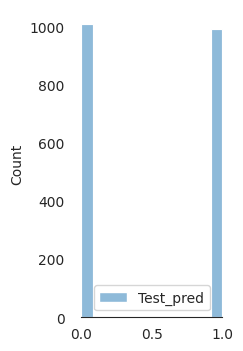

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(2, 4))
sns.histplot(test_pred_df)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
test_pred_all=test.merge(test_pred_df,how='inner',left_index=True,right_index=True)
test_pred_all

,text,label,Test_pred
0,Mukang ma tibay Sia no. 3 Yung gamit ko sapat ...,1,1.0
1,Perfect size for favors! I love these pails! ...,1,1.0
2,"okay naman po dumating, excited ako matry.",0,0.0
3,"cord quit bought this and a 06"" (also copper ...",0,0.0
4,Came broken- please advise This product came ...,0,0.0
...,...,...,...
1995,Terrible I got a damaged/ crushed brush and e...,0,0.0
1996,"Anong ire-rate ko, hindi naman nakarating yung...",0,0.0
1997,Don't Waste Your Money Do not purchase. When ...,0,0.0
1998,"delivered pero Hindi dumating, hndi Ako Ang na...",0,0.0


accuracy is: 94.350%


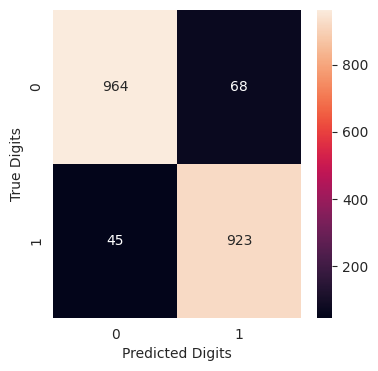

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(test_pred_all['label'], test_pred_all['Test_pred'])
print("accuracy is: {0:.3f}%".format(acc * 100))
cm = confusion_matrix(test_pred_all['label'] , test_pred_all['Test_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()